In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# from google.colab import files
# upload = files.upload()

In [4]:
data_test = pd.read_csv("train.csv")
df = pd.read_csv("train.csv")

In [5]:
data = pd.read_csv("train.csv")

In [6]:
#test_data = pd.read_csv("test.csv")

In [7]:
data.iloc[0]

Airline                  IndiGo
Date_of_Journey      24/03/2019
Source                 Banglore
Destination           New Delhi
Route                 BLR → DEL
Dep_Time                  22:20
Arrival_Time       01:10 22 Mar
Duration                 2h 50m
Total_Stops            non-stop
Additional_Info         No info
Price                      3897
Name: 0, dtype: object

1. EDA

In [8]:
data.shape

(10683, 11)

In [9]:
# can we convert category to datetime64[ns]
df["Date_of_Journey"].astype('datetime64[ns]')

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10683, dtype: datetime64[ns]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
# Missing Values
data.isnull().mean()

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.000094
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.000094
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [12]:
# Missing Values => "Route" & "Total_stops"

In [13]:
# Check Duplicates

In [14]:
data[data.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [15]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [16]:
data.shape

(10463, 11)

In [17]:
# Seperate Features

In [18]:
time_feat = ["Date_of_Journey","Dep_Time","Arrival_Time","Duration"]

In [19]:
input_feat = list(data.columns)[:-1]

In [20]:
cat_feat = [feat for feat in input_feat if feat not in time_feat]

In [21]:
# Check Unique Values

In [22]:
def get_unique_vals(X:pd.DataFrame,feat_list:list):
    for feat in feat_list:
        unique_val_list = X[feat].unique()
        print(f"{feat} unique values: {len(unique_val_list)}")
        if len(unique_val_list) < 20:
            print(unique_val_list)
        print("\n")

In [23]:
get_unique_vals(data,cat_feat)

Airline unique values: 12
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


Source unique values: 5
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


Destination unique values: 6
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


Route unique values: 129


Total_Stops unique values: 6
['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']


Additional_Info unique values: 10
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']




In [24]:
# Route -) Remove column
# Additional_Info -) keep later while converting all to lower case

In [25]:
drop_feat = ["Route","Additional_Info"]
data.drop(drop_feat,axis=1,inplace=True,errors="ignore")

In [26]:
cat_feat = [feat for feat in cat_feat if feat not in drop_feat]

In [27]:
get_unique_vals(data,time_feat)

Date_of_Journey unique values: 44


Dep_Time unique values: 222


Arrival_Time unique values: 1343


Duration unique values: 368




In [28]:
import seaborn as sns

In [29]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,20

Visualize the cat_feat

1.  Price vs Airline

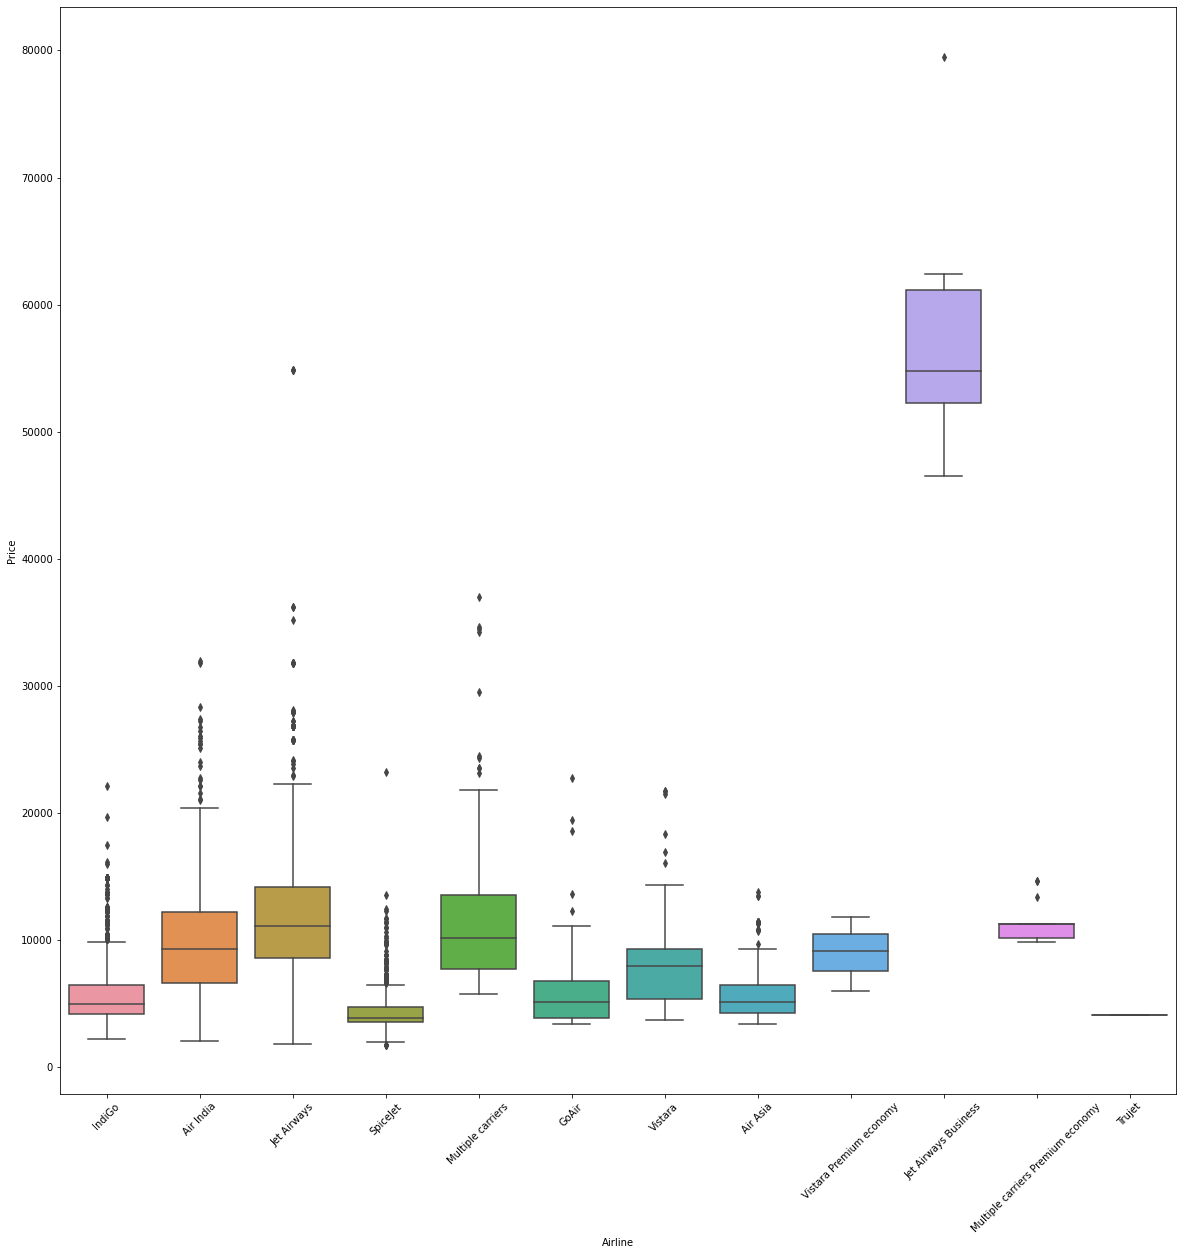

In [30]:
airline_graph = sns.boxplot(x = "Airline", y = "Price", data=data)
for item in airline_graph.get_xticklabels():
    item.set_rotation(45)

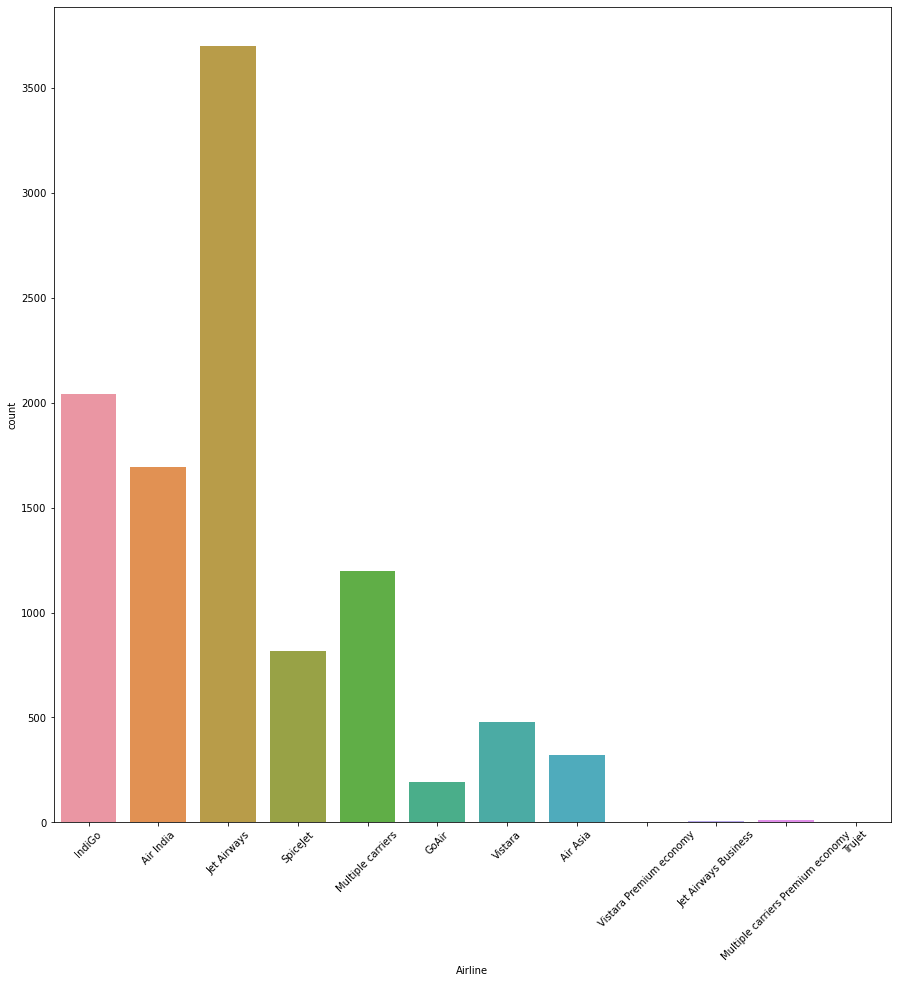

In [31]:
# figure size in inches
rcParams['figure.figsize'] = 15,15
# Price vs Source
airline_graph = sns.countplot(x = "Airline", data=data)
for item in airline_graph.get_xticklabels():
    item.set_rotation(45)

In [32]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

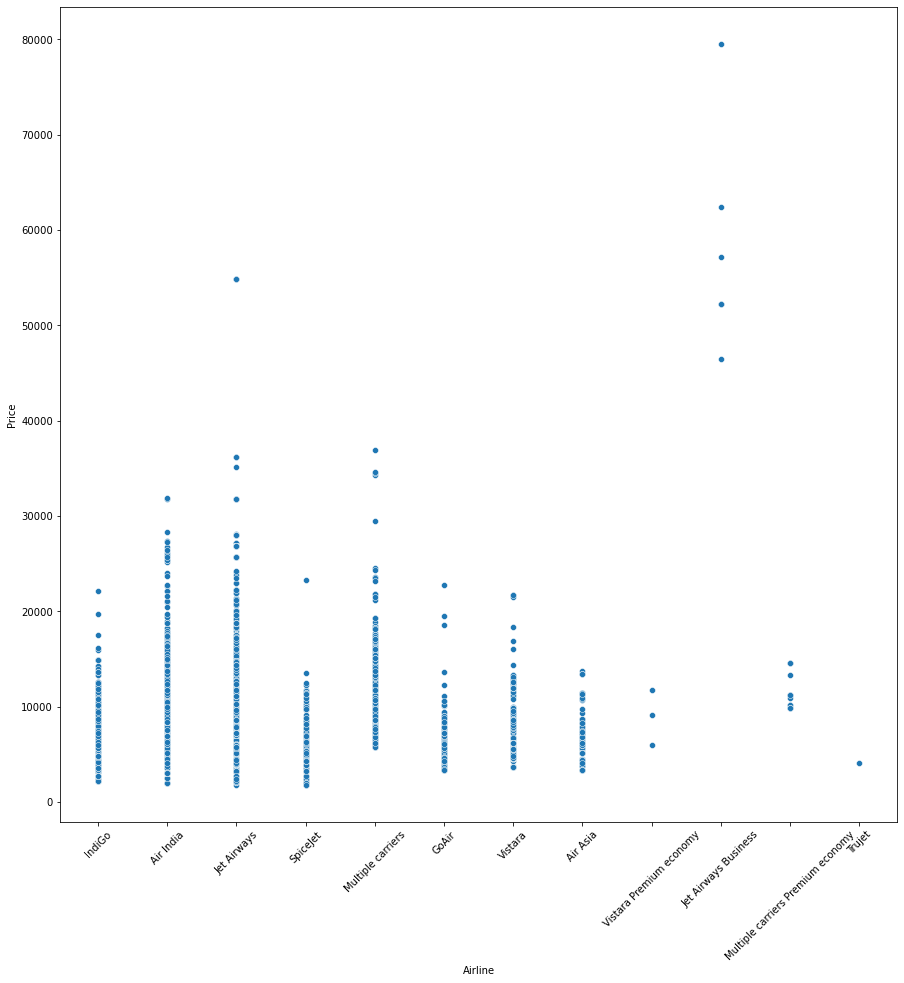

In [33]:
airline_graph = sns.scatterplot(x = "Airline", y = "Price", data = data)
for item in airline_graph.get_xticklabels():
    item.set_rotation(45)

2. Price plots

<AxesSubplot:xlabel='Price'>

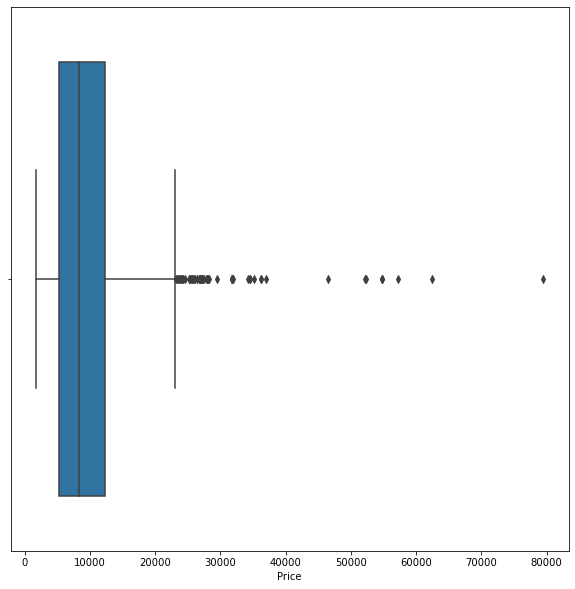

In [34]:
# figure size in inches
rcParams['figure.figsize'] = 10,10
sns.boxplot(x = "Price", data = data)

<AxesSubplot:xlabel='Price', ylabel='Density'>

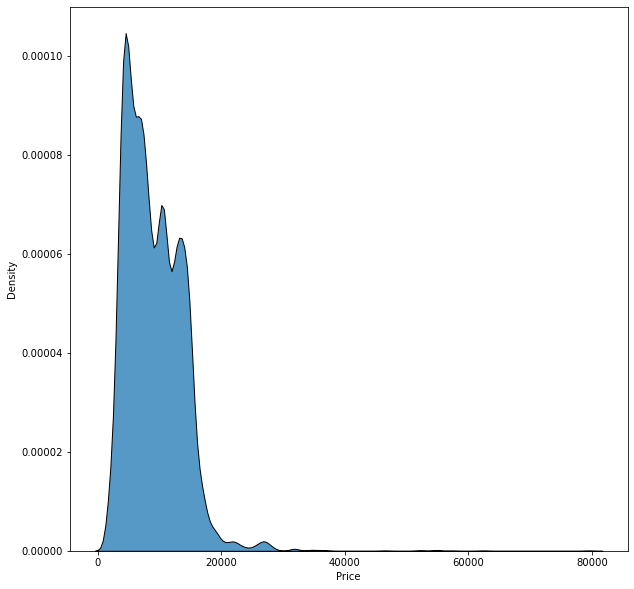

In [35]:
# figure size in inches
rcParams['figure.figsize'] = 10,10
sns.kdeplot(x = "Price", data = data, multiple="stack")

3. Source vs Price

<AxesSubplot:xlabel='Price', ylabel='Density'>

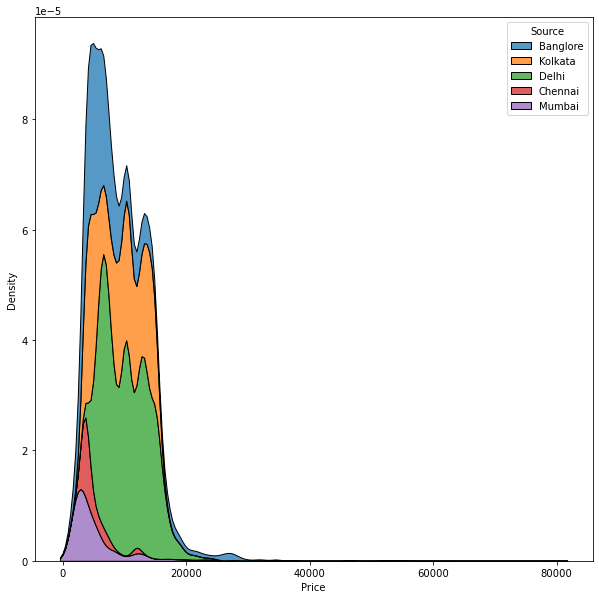

In [36]:
# figure size in inches
rcParams['figure.figsize'] = 10,10
# Price vs Source
sns.kdeplot(x = "Price", data=data, hue = "Source", multiple="stack")

In [37]:
# % Flights from Source
df["Source"].value_counts()/df.shape[0]*100

Delhi       42.469344
Kolkata     26.874473
Banglore    20.565384
Mumbai       6.524385
Chennai      3.566414
Name: Source, dtype: float64

4. Destination vs Price

<AxesSubplot:xlabel='Destination', ylabel='Price'>

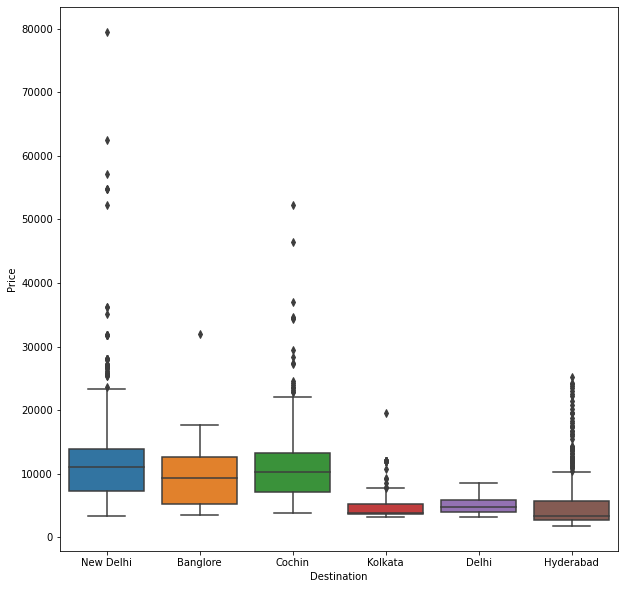

In [38]:
# Price vs Destination
sns.boxplot(x = "Destination", y = "Price", data=data)

In [39]:
# % Flights to Destination
df["Destination"].value_counts()/df.shape[0]*100

Cochin       42.469344
Banglore     26.874473
Delhi        11.841243
New Delhi     8.724141
Hyderabad     6.524385
Kolkata       3.566414
Name: Destination, dtype: float64

5. Total_Stops vs Price

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

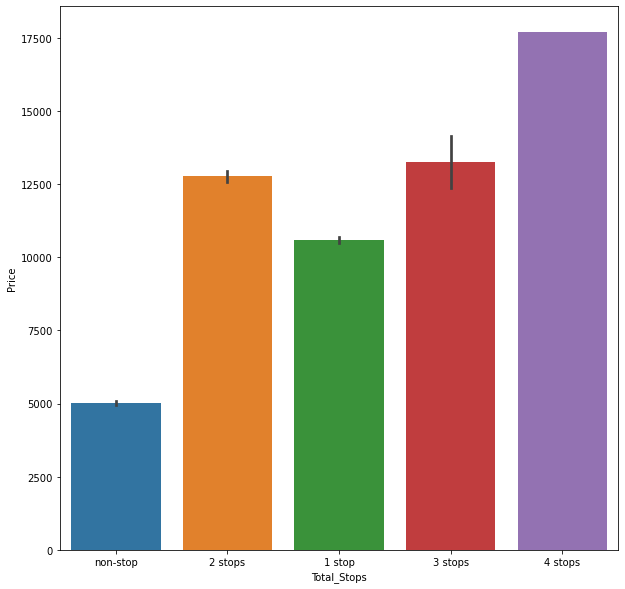

In [40]:
# figure size in inches
rcParams['figure.figsize'] = 10,10
sns.barplot(x = "Total_Stops", y = "Price", data = data)

In [41]:
# % Stops for Flights
df["Total_Stops"].value_counts()/df.shape[0]*100

1 stop      52.653749
non-stop    32.678087
2 stops     14.228213
3 stops      0.421230
4 stops      0.009361
Name: Total_Stops, dtype: float64

Time Features - Feature Splitting

In [42]:
# 1. "Date_of_Journey"

In [43]:
pd.to_datetime(data["Date_of_Journey"]).dt.year.unique()

array([2019], dtype=int64)

In [44]:
data["journey_day"] = pd.to_datetime(data["Date_of_Journey"]).dt.day
data["journey_month"] = pd.to_datetime(data["Date_of_Journey"]).dt.month

In [45]:
data.drop(["Date_of_Journey"],axis=1,inplace=True)
data.iloc[0]

Airline                IndiGo
Source               Banglore
Destination         New Delhi
Dep_Time                22:20
Arrival_Time     01:10 22 Mar
Duration               2h 50m
Total_Stops          non-stop
Price                    3897
journey_day                24
journey_month               3
Name: 0, dtype: object

In [46]:
time_feat.remove("Date_of_Journey")
time_feat.append("journey_day")
time_feat.append("journey_month")

In [47]:
# 2. "Duration"

In [48]:
data["Duration"] = data['Duration'].str.replace("h", '*60').str.replace(' ','+').\
str.replace('m','*1').apply(eval)

In [49]:
# 3. Dep_Time & Arrival_Time

In [50]:
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_minute"] = pd.to_datetime(data["Dep_Time"]).dt.minute 

In [51]:
data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_minute"] = pd.to_datetime(data["Arrival_Time"]).dt.minute

In [52]:
data.drop(["Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [53]:
time_feat.remove("Dep_Time")
time_feat.append("Dep_hour")
time_feat.append("Dep_minute")

time_feat.remove("Arrival_Time")
time_feat.append("Arrival_hour")
time_feat.append("Arrival_minute")

In [54]:
time_feat

['Duration',
 'journey_day',
 'journey_month',
 'Dep_hour',
 'Dep_minute',
 'Arrival_hour',
 'Arrival_minute']

<AxesSubplot:xlabel='journey_month', ylabel='count'>

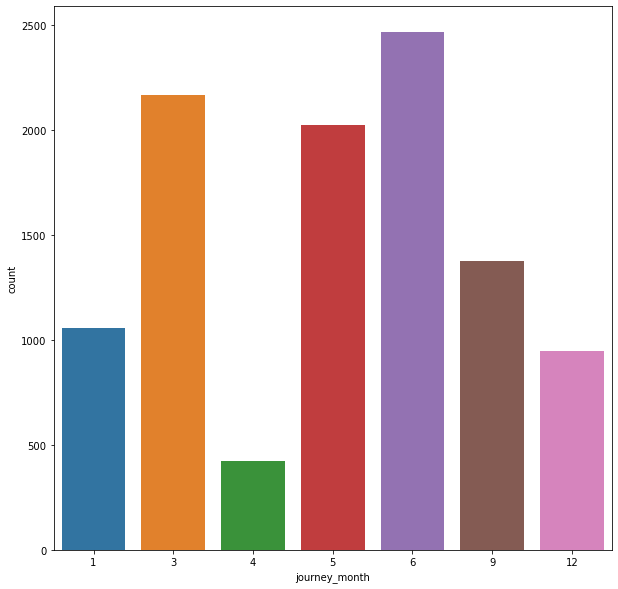

In [55]:
# Duration vs Price 
sns.countplot(x = "journey_month", data = data)

In [56]:
cat_feat

['Airline', 'Source', 'Destination', 'Total_Stops']

In [57]:
pd.set_option('display.max_columns', None)

In [58]:
data_demo = data.copy()

In [59]:
data_demo = pd.get_dummies(data_demo,columns = ['Airline', 'Source', 'Destination'], drop_first = True)

In [60]:
data_demo.shape

(10463, 29)

<AxesSubplot:>

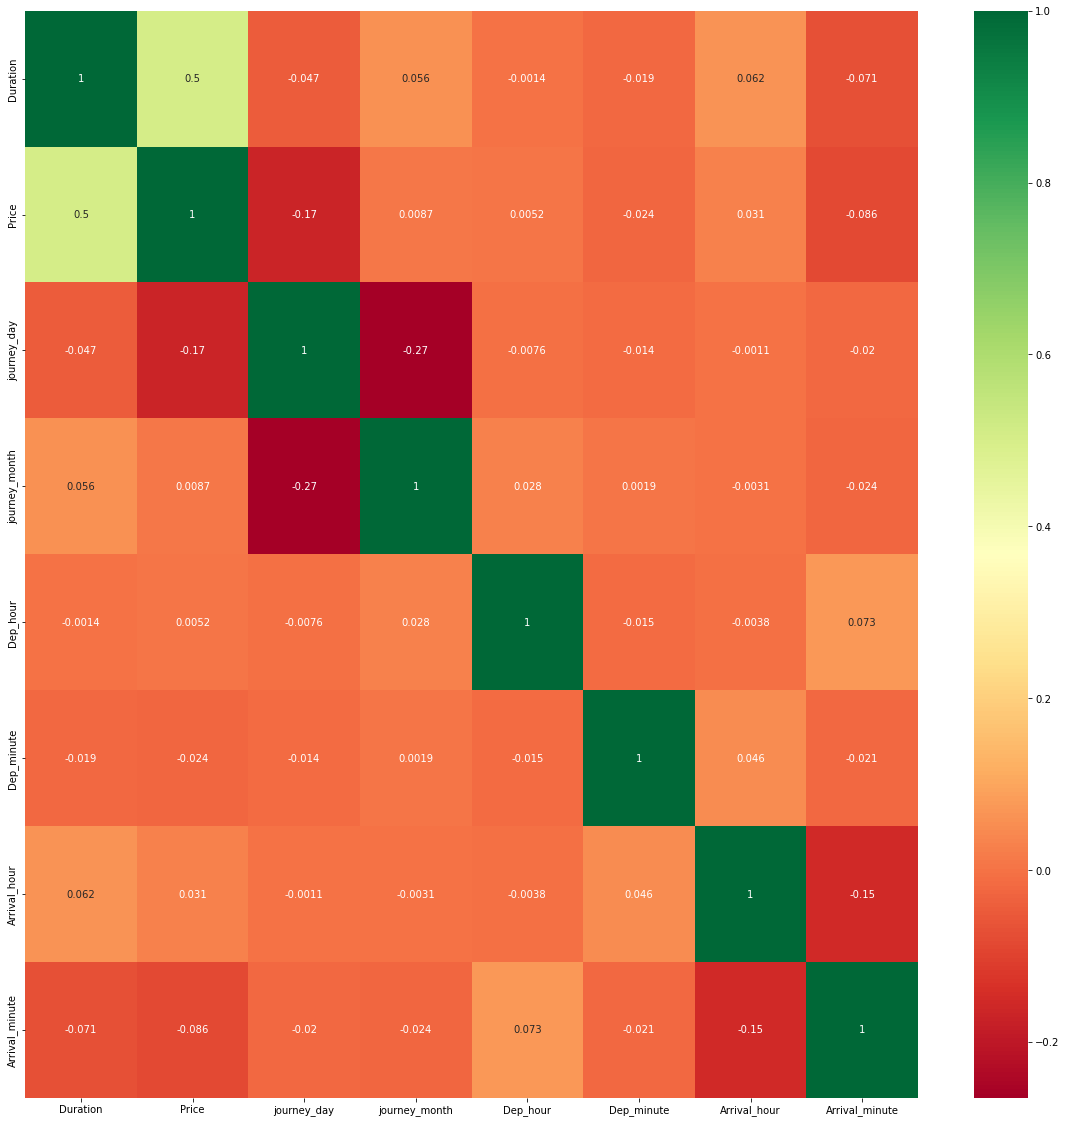

In [61]:
# figure size in inches
rcParams['figure.figsize'] = 20,20
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

In [62]:
data.iloc[0]

Airline              IndiGo
Source             Banglore
Destination       New Delhi
Duration                170
Total_Stops        non-stop
Price                  3897
journey_day              24
journey_month             3
Dep_hour                 22
Dep_minute               20
Arrival_hour              1
Arrival_minute           10
Name: 0, dtype: object

In [63]:
# Imbalance in data
y = data["Price"]
X = data.drop(["Price"],axis=1)

<AxesSubplot:xlabel='Price', ylabel='Density'>

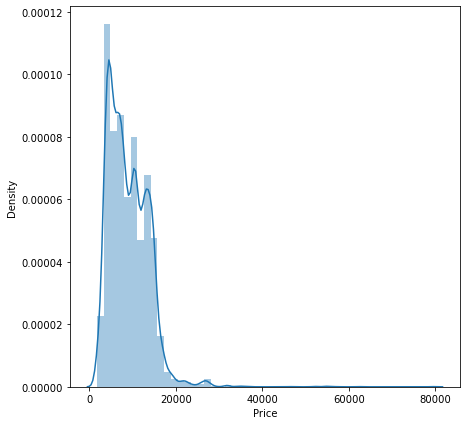

In [64]:
rcParams['figure.figsize'] = 7,7
sns.distplot(y)

2. FEATURE TRANSFORMATION

In [65]:
df_new = df.copy()

Drop Duplicates

In [66]:
df.duplicated().sum()

220

In [67]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [68]:
df.duplicated().sum()

0

Drop rows with categories having 1 count

In [69]:
def drop_exceptions(X : pd.DataFrame, tol = 1, columns = ["Airline","Total_Stops"],)->pd.DataFrame:
    X_new = X.copy()
    for col in columns:
        col_count = X_new[col].value_counts()
        exception_col = col_count[col_count == 1].index.values[0]
        X_new.drop(X_new[X_new[col] == exception_col].index,axis=0,inplace=True,)
        X_new.reset_index(drop=True,inplace=True)
    return X_new

In [70]:
df = drop_exceptions(df,)

In [71]:
df["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64

In [72]:
from sklearn.model_selection import StratifiedShuffleSplit

In [73]:
df["Price"].describe()

count    10461.000000
mean      9026.281809
std       4624.073433
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12341.000000
max      79512.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Count'>

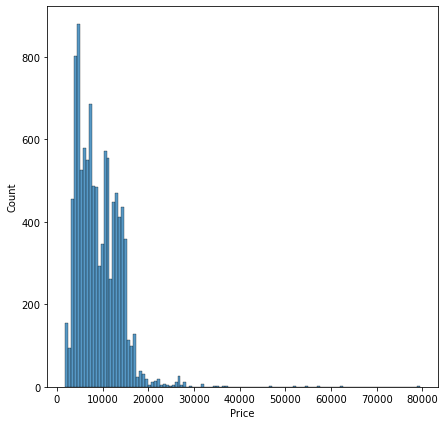

In [74]:
sns.histplot(df["Price"])

In [75]:
df["Price_cat"] = pd.cut(
                df["Price"],
                bins=[1758.0, 5277.0, 8372.0, 12373.0, np.inf],
                labels=[1,2,3,4]
            )

In [76]:
df["Price_cat"].value_counts()/df.shape[0]*100

1    25.695440
2    25.456457
3    24.729949
4    24.118153
Name: Price_cat, dtype: float64

In [77]:
strat_train_set = None
strat_test_set = None

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=24)

In [78]:
strat_df = df[["Price_cat"]]

In [79]:
for train_index,test_index in split.split(df, strat_df):
    strat_train_set = df.loc[train_index].drop(["Price_cat"],axis=1)
    strat_test_set = df.loc[test_index].drop(["Price_cat"],axis=1)

In [80]:
(strat_train_set["Airline"].value_counts()/df["Airline"].value_counts())*100

Jet Airways                           81.648649
IndiGo                                80.469897
Air India                             79.102715
Multiple carriers                     77.090301
SpiceJet                              80.981595
Vistara                               75.313808
Air Asia                              77.742947
GoAir                                 80.412371
Multiple carriers Premium economy     61.538462
Jet Airways Business                 100.000000
Vistara Premium economy              100.000000
Name: Airline, dtype: float64

In [81]:
df["Price"].describe()["min"]

1759.0

<AxesSubplot:xlabel='Price', ylabel='Density'>

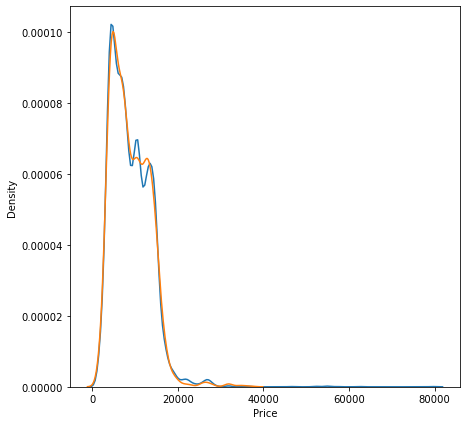

In [82]:
sns.kdeplot(strat_train_set["Price"])
sns.kdeplot(strat_test_set["Price"])

In [83]:
X_train = strat_train_set.drop(["Price"],axis=1)
X_test = strat_test_set.drop(["Price"],axis=1)
y_train = strat_train_set["Price"]
y_test = strat_test_set["Price"]

In [84]:
# Feature Engineering

In [85]:
from sklearn.base import BaseEstimator, TransformerMixin

In [86]:
DAY_KEY = "_day"
MONTH_KEY = "_month"
HOUR_KEY = "_hour"
MINUTE_KEY = "_minute"

In [87]:
class FeatureSplitter(BaseEstimator, TransformerMixin):

    def __init__ (self,date_columns : list =[0], time_columns : list = [1,2],
                 sep = "_"):
        """
        date_columns - 
        Date_of_Journey idx = 0

        time_columns - 
        Dep_Time idx = 1
        Arrival_Time idx = 2

        """
        try:
            self.date_columns : list = date_columns
            self.time_columns : list = time_columns
            self.sep = sep

        except Exception as e:
            print(e)

    def fit (self,X, y=None):
        return self

    def transform(self,X, y=None):
        try:
            # convert any dataframe to numpy array
            X = X.to_numpy()

            # date_columns spliting
            for col in self.date_columns:
                feat_day = pd.to_datetime(X[:,col]).day
                feat_month = pd.to_datetime(X[:,col]).month
                X = np.c_[X,feat_day,feat_month]

            # time_columns splitting
            for col in self.time_columns:
                feat_hour = pd.to_datetime(X[:,col]).hour
                feat_mimute = pd.to_datetime(X[:,col]).minute
                X = np.c_[X,feat_hour,feat_mimute]

            # delete the redundant columns
            idx_shift = 0
            for col in self.date_columns + self.time_columns:
                X = np.delete(X,col-idx_shift,axis=1)
                idx_shift += 1

            return X
        except Exception as e:
            print(e)


In [88]:
class FeatureCalculator(BaseEstimator, TransformerMixin):

    def __init__ (self,feat_calculate_idx = [0]):
        """
        feat_delete_idx - 
        Route idx = 0
        Additional_info idx = 2

        feat_calculate idx - 
        Duration idx = 2
        """
        try:
            self.feat_calculate_idx : list = feat_calculate_idx
            #self.feat_delete_idx : list = feat_delete_idx

        except Exception as e:
            print(e)

    def fit (self,X, y=None):
        return self

    def transform(self,X, y=None)-> np.array:
        try:
            # convert any dataframe to numpy array
            if type(X) is not np.ndarray:
                X = X.to_numpy()

            idx_shift = 0
            """# delete the req. Features
            for col in self.feat_delete_idx:
                X = np.delete(X,col-idx_shift,axis=1)
                idx_shift += 1"""


            """# calculate the feature value
            for col in self.feat_calculate_idx:
                # we are converting duration to
                feat_minutes = pd.Series(X[:,col-idx_shift]).str.replace("h", '*60').\
                str.replace(' ','+').str.replace('m','*1').apply(eval).to_numpy()
                X = np.c_[X,feat_minutes]"""
            for col in self.feat_calculate_idx:
                feat = list(X[:,col-idx_shift])
                # Check if feat contains only hour or mins
                for i in range(len(feat)):
                    if len(feat[i].split()) != 2:    
                        if "h" in feat[i]:
                            feat[i] = feat[i].strip() + " 0m"  # Adds 0 minute
                        else:
                            feat[i] = "0h " + feat[i]   # Adds 0 hour

                feat_hours = []
                feat_minutes = []
                    
                # Extract hours & minutes
                for i in range(len(feat)):
                    feat_hours.append(int(feat[i].split(sep = "h")[0]))    
                    feat_minutes.append(int(feat[i].split(sep = "m")[0].split()[-1]))    
                X = np.c_[X,feat_hours,feat_minutes]
                
                # delete the redundant column
                X = np.delete(X,col-idx_shift,axis=1)
                idx_shift += 1

            return X

        except Exception as e:
            print(e)


In [89]:
num_feat = [feat for feat in data_test if feat not in cat_feat]
num_feat.remove("Price")
num_feat.remove("Route")
num_feat.remove("Additional_Info")
print(num_feat)

['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration']


In [90]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [91]:
num_pipeline = Pipeline(steps=[
                       ("feature_splitter", FeatureSplitter()),
                       ("feature_calculator", FeatureCalculator()),
                       ("simple_imputer", SimpleImputer(strategy="median")),
                       ("scalar", StandardScaler())
])

In [92]:
cat_ohe_pipeline = Pipeline(steps=[
                                   ("One_Hot_Encoder",OneHotEncoder(drop="first",
                                        sparse=False)),
                                   ("simple_imputer", SimpleImputer(
                                       strategy="most_frequent")),
                                   ("scalar", StandardScaler(with_mean=False))
])

In [93]:
cat_ordinal_pipeline = Pipeline(steps=[
                                   ("simple_imputer", SimpleImputer(
                                       strategy="most_frequent")),
                                   ("Ordinal_encoder",OrdinalEncoder()),
                                   ("scalar", StandardScaler(with_mean=False))
])

In [94]:
preprocessing = ColumnTransformer([
                ('num_pipeline', num_pipeline, num_feat),
                ('cat_ohe_pipeline', cat_ohe_pipeline, cat_feat[:-1]),
                ('cat_ordinal_pipeline', cat_ordinal_pipeline, [cat_feat[-1],])
            ],)

In [95]:
[feat for feat in cat_feat if feat not in ["Total_Stops"]]

['Airline', 'Source', 'Destination']

In [96]:
X_train_new = X_train.drop(["Route","Additional_Info"],axis=1)
X_test_new =  X_test.drop(["Route","Additional_Info"],axis=1)

In [100]:
X_train_arr = np.array(X_train_new)
X_test_arr = np.array(X_test_new)

In [101]:
X_train_trf = preprocessing.fit_transform(X_train_arr)
X_test_trf = preprocessing.transform(X_test_arr)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [115]:
X_train_trf.shape

(8368, 27)

3. Model Training
 - Random Forest
 - SVM
 - LinearRegression
 - XGBoost
 - Voting Regressor

In [93]:
!pip3 install xgboost

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [95]:
rand_forest = RandomForestRegressor(n_jobs=-1,random_state=42)
#svr = SVR()
linear = LinearRegression()
lasso_reg = Lasso(alpha=0.1)
xg = XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, objective="reg:linear", booster='gbtree', 
                  n_jobs=-1,random_state=42)

In [96]:
models = [rand_forest,linear,xg,lasso_reg]
estimators = [("rand_forest",rand_forest), ("linear",linear), ("xg",xg), ("lasso_reg",lasso_reg)]

In [109]:
labels = {rand_forest : "rand_forest", linear : "linear", 
          xg : "xg_boost", lasso_reg : "lasso_reg"}

In [110]:
voting = VotingRegressor(estimators=estimators,weights=[3,1,3,1],n_jobs=-1)

In [111]:
from sklearn.model_selection import cross_val_score

In [118]:
validation_scores = dict()
for model in models:
    scores = cross_val_score(model,X_train_trf,y_train,scoring="r2",cv=10,n_jobs=-1)
    validation_scores[model] = scores.mean()
    print(labels[model], " - ", scores.mean())

rand_forest  -  0.8045142228771877
linear  -  0.5808373491494077
xg_boost  -  0.7703113743029332
lasso_reg  -  0.5808391315074383


In [114]:
model_coll = models + [voting,]

In [119]:
scores_voting = cross_val_score(voting,X_train_trf,y_train,scoring="r2",cv=10,
                                n_jobs=-1)
validation_scores[voting] = scores_voting.mean()

In [120]:
labels[voting] = "voting"
print(labels[voting], " - ", scores_voting.mean())

voting  -  0.7945191309681462


In [121]:
test_scores = dict()
# test accuracy
from sklearn.metrics import r2_score
for model in model_coll:
    model.fit(X_train_trf,y_train)
    y_pred = model.predict(X_test_trf)
    r2 = r2_score(y_test,y_pred)
    test_scores[model] = r2
    print(labels[model], " - ", r2)

rand_forest  -  0.7832131218447175
linear  -  0.5638571066951419
[13:42:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
xg_boost  -  0.7555118333581717
lasso_reg  -  0.563851813815563
voting  -  0.7723475585557422


In [122]:
diff_scores = dict()
for key in validation_scores:
    diff_scores[key] = validation_scores[key] - test_scores[key]
    print(labels[key] , " - " , diff_scores[key])

rand_forest  -  0.021301101032470182
linear  -  0.01698024245426577
xg_boost  -  0.014799540944761436
lasso_reg  -  0.016987317691875226
voting  -  0.022171572412403973


Grid Search CV

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
# Random Forest
#RandomForestRegressor()

In [128]:
tree_depth_list = [estimator.tree_.max_depth for estimator in rand_forest.estimators_]

In [129]:
min_tree_depth = min(tree_depth_list)
max_tree_depth = max(tree_depth_list)
print("Max. tree depth - ", max_tree_depth)
print("Min. tree depth - ", min_tree_depth)

Max. tree depth -  32
Min. tree depth -  24


In [130]:
"""
min_samples_split=2, 
min_samples_leaf=1, 
min_weight_fraction_leaf=0, 
max_features="auto", 
max_leaf_nodes=None, 
min_impurity_decrease=0, 
bootstrap=True, 
ccp_alpha=0, 
"""
# "oob_score" : [True,False]
# 

param_grid_rf = {"n_estimators" : [50,100,150,200],
                 "max_depth" : [8,16,24,32],
                 "criterion" : ["squared_error", "absolute_error", "poisson"],
              }

In [131]:
grid = GridSearchCV(estimator=rand_forest,param_grid=param_grid_rf,
                    scoring="r2",n_jobs=-1,cv=5,verbose=2)

In [ ]:
grid.fit(X_train_trf,y_train)

In [ ]:
grid.fit(X_train_trf,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [132]:
duration = list(data_test["Duration"].to_numpy())

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration